# Predicting Financial Well-Being: A Machine Learning Approach

## Final Project for Course PPOL 565: Data Science II - Applied Statistical Learning, Spring 2020

#### Andy Green
#### Georgetown University
#### May 4, 2020

### Section 1: Initial Data Set-up Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm
import copy
from sklearn import preprocessing

In [2]:
## Reading in the data
data = pd.read_csv("data.csv")
data.head(10)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
5,10910,1,3,5,7,5,67,5,1,1,...,1,2,3,0,0,0,0,2,0,0.760061
6,11079,1,3,5,4,7,51,1,3,2,...,1,2,4,0,0,1,1,3,0,1.370522
7,7741,1,3,2,2,2,47,1,2,4,...,1,2,4,0,0,0,0,3,0,1.193365
8,8303,1,3,7,7,7,43,4,5,2,...,1,3,7,0,0,0,1,3,0,2.497838
9,9688,1,3,4,5,4,58,3,3,2,...,1,1,2,0,0,0,0,3,0,1.266602


In [3]:
## The following is code provided by the CFPB in order to map the numerical values in the dataset to substantive
## values. I will mostly use the data with numerical values (as is necessary for running models and such), but
## it is convenient to have this for creating summaries and similar tasks. My apologies for the long scroll to
## get past it.
mappings = {"sample":{
  1: "General population",
  2: "Age 62+ oversample",
  3: "Race/ethnicity and poverty oversample"
},
"fpl":{
  1: "<100% FPL",
  2: "100%-199% FPL",
  3: "200%+ FPL"
},
"SWB_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"SWB_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "1 Strongly disagree",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 Strongly agree"
},
"FWBscore":{
  -4: "Response not written to database",
  -1: "Refused"
},
"FWB1_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_5":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB1_6":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FWB2_1":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_2":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_3":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FWB2_4":{
  -4: "Response not written to database",
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FSscore":{
  -1: "Refused"
},
"FS1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_4":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_5":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_6":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS1_7":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FS2_1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_2":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"FS2_3":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBKNOWL1":{
  -1: "Refused",
  1: "1 - Very low",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7 - Very high"
},
"ACT1_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"ACT1_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Very little",
  3: "Somewhat",
  4: "Very well",
  5: "Completely"
},
"FINGOALS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"PROPPLAN_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"PROPPLAN_4":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MANAGE1_1":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_2":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_3":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"MANAGE1_4":{
  -1: "Refused",
  1: "Not applicable or never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SAVEHABIT":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"FRUGALITY":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Disagree slightly",
  4: "Agree slightly",
  5: "Agree",
  6: "Strongly agree"
},
"AUTOMATED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"AUTOMATED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  7: "I do not have this type of account"
},
"ASK1_1":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"ASK1_2":{
  -1: "Refused",
  1: "Never",
  2: "Seldom",
  3: "Sometimes",
  4: "Often",
  5: "Always"
},
"SUBNUMERACY2":{
  -1: "Refused",
  1: "1 - Always prefer words",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Always prefer numbers"
},
"SUBNUMERACY1":{
  -1: "Refused",
  1: "1 - Not good at all",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6 - Extremely good"
},
"CHANGEABLE":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"GOALCONF":{
  -1: "Refused",
  1: "Not at all confident",
  2: "Not very confident",
  3: "Somewhat confident",
  4: "Very confident"
},
"FINKNOWL1":{
  -1: "Refused",
  1: "More than $102",
  2: "Exactly $102",
  3: "Less than $102"
},
"FINKNOWL2":{
  -1: "Refused",
  1: "More than today",
  2: "Exactly the same",
  3: "Less than today"
},
"FINKNOWL3":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"FK1correct":{
  0: "No",
  1: "Yes"
},
"FK2correct":{
  0: "No",
  1: "Yes"
},
"FK3correct":{
  0: "No",
  1: "Yes"
},
"KHKNOWL1":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL2":{
  -1: "Refused",
  1: "Savings accounts",
  2: "Bonds",
  3: "Stocks"
},
"KHKNOWL3":{
  -1: "Refused",
  1: "Increase",
  2: "Decrease",
  3: "Stay the same"
},
"KHKNOWL4":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL5":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL6":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KHKNOWL7":{
  -1: "Refused",
  1: "Less than 5 years",
  2: "Between 5 and 10 years",
  3: "Between 10 and 15 years",
  4: "Never, you will continue to be in debt"
},
"KHKNOWL8":{
  -1: "Refused",
  1: "They will rise",
  2: "They will fall",
  3: "They will stay the same",
  4: "There is no relationship between bond prices and the interest rate"
},
"KHKNOWL9":{
  -1: "Refused",
  1: "True",
  2: "False"
},
"KH1correct":{
  0: "No",
  1: "Yes"
},
"KH2correct":{
  0: "No",
  1: "Yes"
},
"KH3correct":{
  0: "No",
  1: "Yes"
},
"KH4correct":{
  0: "No",
  1: "Yes"
},
"KH5correct":{
  0: "No",
  1: "Yes"
},
"KH6correct":{
  0: "No",
  1: "Yes"
},
"KH7correct":{
  0: "No",
  1: "Yes"
},
"KH8correct":{
  0: "No",
  1: "Yes"
},
"KH9correct":{
  0: "No",
  1: "Yes"
},
"ENDSMEET":{
  -1: "Refused",
  1: "Not at all difficult",
  2: "Somewhat difficult",
  3: "Very difficult"
},
"HOUSING":{
  -1: "Refused",
  1: "I own my home",
  2: "I rent",
  3: "I do not currently own or rent"
},
"LIVINGARRANGEMENT":{
  -1: "Refused",
  1: "I am the only adult in the household",
  2: "I live with my spouse/partner/significant other",
  3: "I live in my parents home",
  4: "I live with other family, friends, or roommates",
  5: "Some other arrangement"
},
"HOUSERANGES":{
  -1: "Refused",
  1: "Less than $300",
  2: "$300-499",
  3: "$500-749",
  4: "$750-999",
  5: "$1,000-1,499",
  6: "$1,500-1,999",
  7: "$2,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"IMPUTATION_FLAG":{
  0: "Not imputed",
  1: "Imputed"
},
"VALUERANGES":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $150,000",
  2: "$150,000-249,999",
  3: "$250,000-399,999",
  4: "$400,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"MORTGAGE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Less than $50,000",
  2: "$50,000-199,999",
  3: "$200,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"SAVINGSRANGES":{
  -1: "Refused",
  1: "0",
  2: "$1-99",
  3: "$100-999",
  4: "$1,000-4,999",
  5: "$5,000-19,999",
  6: "$20,000-74,999",
  7: "$75,000 or more",
  98: "I dont know",
  99: "Prefer not to say"
},
"PRODHAVE_1":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_2":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_3":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_4":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_5":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_6":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_7":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_8":{
  0: "No",
  1: "Yes"
},
"PRODHAVE_9":{
  0: "No",
  1: "Yes"
},
"PRODUSE_1":{
  0: "No",
  1: "Yes"
},
"PRODUSE_2":{
  0: "No",
  1: "Yes"
},
"PRODUSE_3":{
  0: "No",
  1: "Yes"
},
"PRODUSE_4":{
  0: "No",
  1: "Yes"
},
"PRODUSE_5":{
  0: "No",
  1: "Yes"
},
"PRODUSE_6":{
  0: "No",
  1: "Yes"
},
"CONSPROTECT1":{
  -1: "Refused",
  1: "Never",
  2: "Rarely",
  3: "Sometimes",
  4: "Often"
},
"CONSPROTECT2":{
  -1: "Refused",
  1: "Not at all familiar",
  2: "Somewhat familiar",
  3: "Very familiar"
},
"CONSPROTECT3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"EARNERS":{
  -1: "Refused",
  1: "One",
  2: "Two",
  3: "More than two"
},
"VOLATILITY":{
  -1: "Refused",
  1: "Roughly the same each month",
  2: "Roughly the same most months, but some unusually high or low months during the year",
  3: "Often varies quite a bit from one month to the next"
},
"SNAP":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"MATHARDSHIP_1":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_2":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_3":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_4":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_5":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"MATHARDSHIP_6":{
  -1: "Refused",
  1: "Never",
  2: "Sometimes",
  3: "Often"
},
"COLLECT":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"REJECTED_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"REJECTED_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"ABSORBSHOCK":{
  -1: "Refused",
  1: "I am certain I could not come up with $2,000",
  2: "I could probably not come up with $2,000",
  3: "I could probably come up with $2,000",
  4: "I am certain I could come up with the full $2,000",
  8: "I dont know"
},
"BENEFITS_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BENEFITS_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FRAUD2":{
  -1: "Refused",
  0: "No",
  1: "Yes",
  8: "Not sure"
},
"COVERCOSTS":{
  -1: "Refused",
  1: "Use savings or sell something you own",
  2: "Cut back or do without",
  3: "Earn more money",
  4: "Borrow money"
},
"BORROW_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"BORROW_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SHOCKS_1":{
  0: "No",
  1: "Yes"
},
"SHOCKS_2":{
  0: "No",
  1: "Yes"
},
"SHOCKS_3":{
  0: "No",
  1: "Yes"
},
"SHOCKS_4":{
  0: "No",
  1: "Yes"
},
"SHOCKS_5":{
  0: "No",
  1: "Yes"
},
"SHOCKS_6":{
  0: "No",
  1: "Yes"
},
"SHOCKS_7":{
  0: "No",
  1: "Yes"
},
"SHOCKS_8":{
  0: "No",
  1: "Yes"
},
"SHOCKS_9":{
  0: "No",
  1: "Yes"
},
"SHOCKS_10":{
  0: "No",
  1: "Yes"
},
"SHOCKS_11":{
  0: "No",
  1: "Yes"
},
"SHOCKS_12":{
  0: "No",
  1: "Yes"
},
"MANAGE2":{
  -1: "Refused",
  1: "Someone else takes care of all or most money matters in my household.",
  2: "Someone else and I take care of money matters in my household about the same.",
  3: "I take care of all or most money matters in my household."
},
"PAIDHELP":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"HSLOC":{
  -1: "Refused",
  1: "U.S. and territories",
  2: "Outside the U.S.",
  8: "I cant recall"
},
"PAREDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"FINSOC2_1":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_2":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_3":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_4":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_5":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_6":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"FINSOC2_7":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"OBJNUMERACY1":{
  -1: "Refused",
  1: "1%",
  2: "10%",
  3: "5%"
},
"ON2correct":{
  0: "No",
  1: "Yes"
},
"ON1correct":{
  0: "No",
  1: "Yes"
},
"MATERIALISM_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"MATERIALISM_3":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"CONNECT":{
  -1: "Refused"
},
"HEALTH":{
  -1: "Refused",
  1: "Poor",
  2: "Fair",
  3: "Good",
  4: "Very good",
  5: "Excellent"
},
"SCFHORIZON":{
  -1: "Refused",
  1: "The next few months",
  2: "The next year",
  3: "The next few years",
  4: "The next 5 to 10 years",
  5: "Longer than 10 years"
},
"DISCOUNT":{
  -1: "Refused",
  1: "$816 now",
  2: "$860 in three months"
},
"MEMLOSS":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"DISTRESS":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Neither agree nor disagree",
  4: "Agree",
  5: "Strongly agree"
},
"SELFCONTROL_1":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_2":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"SELFCONTROL_3":{
  -1: "Refused",
  1: "Not at all",
  2: "Not very well",
  3: "Very well",
  4: "Completely well"
},
"OUTLOOK_1":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"OUTLOOK_2":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Somewhat disagree",
  3: "Neither agree nor disagree",
  4: "Somewhat agree",
  5: "Strongly agree"
},
"INTERCONNECTIONS_1":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_2":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_3":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_4":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_5":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_6":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_7":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_8":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_9":{
  0: "No",
  1: "Yes"
},
"INTERCONNECTIONS_10":{
  0: "No",
  1: "Yes"
},
"PEM":{
  -1: "Refused",
  1: "Strongly disagree",
  2: "Disagree",
  3: "Somewhat disagree",
  4: "Neither agree nor disagree",
  5: "Somewhat agree",
  6: "Agree",
  7: "Strongly agree"
},
"HOUSESAT":{
  -1: "Refused",
  1: "Not at all satisfied",
  2: "Not very satisfied",
  3: "Somewhat satisfied",
  4: "Very satisfied"
},
"SOCSEC1":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"SOCSEC2":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70 and above"
},
"SOCSEC3":{
  -3: "Invalid Response",
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  61: "61 and below",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71 and above"
},
"LIFEEXPECT":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5",
  6: "6",
  7: "7",
  8: "8",
  9: "9",
  10: "10",
  11: "11",
  12: "12",
  15: "15",
  20: "20",
  22: "22",
  24: "24",
  25: "25",
  26: "26",
  28: "28",
  29: "29",
  30: "30",
  33: "33",
  35: "35",
  36: "36",
  37: "37",
  40: "40",
  41: "41",
  42: "42",
  43: "43",
  44: "44",
  45: "45",
  47: "47",
  50: "50",
  52: "52",
  54: "54",
  55: "55",
  56: "56",
  57: "57",
  59: "59",
  60: "60",
  62: "62",
  63: "63",
  64: "64",
  65: "65",
  66: "66",
  67: "67",
  68: "68",
  69: "69",
  70: "70",
  71: "71",
  72: "72",
  73: "73",
  75: "75",
  76: "76",
  77: "77",
  78: "78",
  79: "79",
  80: "80",
  81: "81",
  82: "82",
  83: "83",
  84: "84",
  85: "85",
  86: "86",
  87: "87",
  88: "88",
  89: "89",
  90: "90",
  91: "91",
  92: "92",
  93: "93",
  94: "94",
  95: "95",
  96: "96",
  97: "97",
  98: "98",
  99: "99",
  100: "100"
},
"HHEDUC":{
  -1: "Refused",
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"KIDS_NoChildren":{
  -1: "Refused",
  0: "Respondent financially supports children",
  1: "I have no children that I financially support"
},
"KIDS_1":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_2":{
  -3: "Invalid Response",
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_3":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"KIDS_4":{
  -1: "Refused",
  0: "0",
  1: "1",
  2: "2+"
},
"EMPLOY":{
  1: "Self-employed",
  2: "Work full-time for an employer or the military",
  3: "Work part-time for an employer or the military",
  4: "Homemaker",
  5: "Full-time student",
  6: "Permanently sick, disabled or unable to work",
  7: "Unemployed or temporarily laid off",
  8: "Retired",
  99: "Refused"
},
"EMPLOY1_1":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_2":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_3":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_4":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_5":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_6":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_7":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_8":{
  0: "No",
  1: "Yes"
},
"EMPLOY1_9":{
  0: "No",
  1: "Yes"
},
"RETIRE":{
  -2: "Question not asked because respondent not in item base",
  -1: "Refused",
  1: "Earlier than planned",
  2: "About when planned",
  3: "Later than planned"
},
"MILITARY":{
  -1: "Refused",
  0: "No",
  1: "Yes"
},
"Military_Status":{
  -1: "Refused",
  1: "Active military (active, reserve, natl guard)",
  2: "Veteran (veteran or retired)",
  3: "Spouse/dependent Active",
  4: "Spouse/dependent Veteran",
  5: "Neither Active nor Veteran"
},
"agecat":{
  1: "18-24",
  2: "25-34",
  3: "35-44",
  4: "45-54",
  5: "55-61",
  6: "62-69",
  7: "70-74",
  8: "75+"
},
"generation":{
  1: "Pre-Boomer",
  2: "Boomer",
  3: "Gen X",
  4: "Millennial"
},
"PPEDUC":{
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"PPETHM":{
  1: "White, Non-Hispanic",
  2: "Black, Non-Hispanic",
  3: "Other, Non-Hispanic",
  4: "Hispanic"
},
"PPGENDER":{
  1: "Male",
  2: "Female"
},
"PPHHSIZE":{
  1: "1",
  2: "2",
  3: "3",
  4: "4",
  5: "5+"
},
"PPINCIMP":{
  1: "Less than $20,000",
  2: "$20,000 to $29,999",
  3: "$30,000 to $39,999",
  4: "$40,000 to $49,999",
  5: "$50,000 to $59,999",
  6: "$60,000 to $74,999",
  7: "$75,000 to $99,999",
  8: "$100,000 to $149,999",
  9: "$150,000 or more"
},
"PPMARIT":{
  1: "Married",
  2: "Widowed",
  3: "Divorced/Separated",
  4: "Never married",
  5: "Living with partner"
},
"PPMSACAT":{
  0: "Non-Metro",
  1: "Metro"
},
"PPREG4":{
  1: "Northeast",
  2: "Midwest",
  3: "South",
  4: "West"
},
"PPREG9":{
  1: "New England",
  2: "Mid-Atlantic",
  3: "East-North Central",
  4: "West-North Central",
  5: "South Atlantic",
  6: "East-South Central",
  7: "West-South Central",
  8: "Mountain",
  9: "Pacific"
},
"PPT01":{
  0: "0",
  1: "1+"
},
"PPT25":{
  0: "0",
  1: "1+"
},
"PPT612":{
  0: "0",
  1: "1+"
},
"PPT1317":{
  0: "0",
  1: "1+"
},
"PPT18OV":{
  1: "1",
  2: "2",
  3: "3",
  4: "4+"
},
"PCTLT200FPL":{
  -5: "County is not known",
  0: "Less than 40% of county population below 200% of poverty level",
  1: "40% or more of county population below 200% of poverty level"
}}

In [4]:
## Checking # of observations in dataset
len(data)

6394

In [5]:
## Replacing non-substantive values with NA's for easier identification
data = data.replace(-4,np.NaN)
data = data.replace(-1,np.NaN)
data = data.replace(99,np.NaN)

In [6]:
## Adding in "FINSOC" variable, which will just be a sum of the values for each of the 7 FINSOC variables. 
## This is a similar methodology to what they've already done for other variables in the dataset.
data['FINSOC'] = data['FINSOC2_1'] + data['FINSOC2_2'] + data['FINSOC2_3'] + data['FINSOC2_4'] + data['FINSOC2_5'] + data['FINSOC2_6'] + data['FINSOC2_7']

In [7]:
## Converting categorical variables to dummies
cat_vars = ['PPETHM','PPGENDER','PPMARIT','PPREG4','COVERCOSTS']
data = pd.get_dummies(data, prefix_sep="_",
                              columns=cat_vars)

## Section 2: Feature Evaluation and Selection

In [8]:
## Creating the linear regression model object
lin_reg = LinearRegression()

In [9]:
## Creating lists of relevant variable names
y_var = ['FWBscore']
demo_vars = ['PAREDUC', 'EMPLOY1_1', 'EMPLOY1_2', 'EMPLOY1_3', 'EMPLOY1_4', 'EMPLOY1_5', 'EMPLOY1_6', 
                'EMPLOY1_7', 'EMPLOY1_8', 'EMPLOY1_9', 'agecat', 'PPEDUC', 'PPETHM_1', 'PPETHM_2', 'PPETHM_3', 
                'PPETHM_4', 'PPGENDER_1', 'PPGENDER_2', 'PPHHSIZE', 'PPMARIT_1', 'PPMARIT_2',
                'PPMARIT_3', 'PPMARIT_4', 'PPMARIT_5', 'PPMSACAT', 'PPREG4_1', 'PPREG4_2', 'PPREG4_3', 'PPREG4_4']
skills_vars = ['FSscore', 'SUBKNOWL1', 'LMscore', 'KHscore', 'FINSOC']
goals_vars = ['ACT1_1', 'ACT1_2', 'FINGOALS', 'PROPPLAN_1', 'PROPPLAN_2', 'PROPPLAN_3', 'PROPPLAN_4', 'SCFHORIZON',
              'SELFCONTROL_1', 'SELFCONTROL_2', 'SELFCONTROL_3', ]
habits_vars = ['MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3', 'MANAGE1_4', 'SAVEHABIT', 'FRUGALITY', 'ASK1_1', 'ASK1_2']
products_vars = ['PRODHAVE_1', 'PRODHAVE_2', 'PRODHAVE_3', 'PRODHAVE_4', 'PRODHAVE_5', 'PRODHAVE_6', 'PRODHAVE_7', 
                 'PRODHAVE_8', 'PRODHAVE_9', 'PRODUSE_1', 'PRODUSE_2',  'PRODUSE_3',  'PRODUSE_4',  'PRODUSE_5',  
                 'PRODUSE_6',  ]
beliefs_vars = ['CHANGEABLE', 'MATERIALISM_1','MATERIALISM_2', 'MATERIALISM_3', 'PEM']
shocks_vars = ['SHOCKS_1', 'SHOCKS_2', 'SHOCKS_3', 'SHOCKS_4', 'SHOCKS_5', 'SHOCKS_6', 'SHOCKS_7', 'SHOCKS_8', 
               'SHOCKS_9', 'SHOCKS_10', 'SHOCKS_11', 'SHOCKS_12', ]
hardships_vars = ['MATHARDSHIP_1', 'MATHARDSHIP_2', 'MATHARDSHIP_3', 'MATHARDSHIP_4', 'MATHARDSHIP_5', 
                  'MATHARDSHIP_6', 'REJECTED_1', 'REJECTED_2']
benefits_income_vars = ['EARNERS','VOLATILITY','BENEFITS_1', 'BENEFITS_2', 'BENEFITS_3', 'BENEFITS_4', 
                        'BENEFITS_5', 'COVERCOSTS_1.0', 'COVERCOSTS_2.0', 'COVERCOSTS_3.0', 'COVERCOSTS_4.0', 
                        'BORROW_1', 'BORROW_2','PPINCIMP']
health_vars = ['HEALTH', 'MEMLOSS', 'DISTRESS']
wt = ['finalwt']

## Creating lists of the variable groups and their corresponding descriptions
var_groups = [demo_vars, skills_vars, goals_vars, habits_vars, products_vars, beliefs_vars, shocks_vars, hardships_vars, benefits_income_vars, health_vars]
var_descriptions = ["Demographics", "Financial Skills/Knowledge", "Financial Goals/Planning", "Financial Habits", "Financial Products", "Financial Beliefs", "Shocks", "Hardships Suffered", "Benefits and Income", "Health"]

In [10]:
#### Preliminary diagnostics to evaluate which variable groups are more effective at predicting financial well-being

## Creating an empty dataframe to append results to
results = pd.DataFrame(columns = ['Variable Group', 'Cross-Validated R^2'])

## Creating a loop to do cross-validation on each group of variables
for i in range(0,len(var_groups)):
    
    all_vars = data[y_var + var_groups[i]]
    all_vars = all_vars.dropna()

    ## Setting dependent variable
    y = all_vars[y_var]

    ## Setting feature matrix
    X = all_vars[var_groups[i]]

    ## Cross-val scores
    cross_vals = cross_val_score(lin_reg, X, y, cv = 5, error_score = 'raise')
    cross_vals_mean = np.mean(cross_vals)
    
    ## Append results to dictionary
    results1 = pd.DataFrame({"Variable Group":[var_descriptions[i]],
                             "Cross-Validated R^2":[round(cross_vals_mean,2)]})
    results = results.append(results1)
    
results.sort_values(by=['Cross-Validated R^2'], ascending = False)

,Variable Group,Cross-Validated R^2
0,Financial Habits,0.39
0,Financial Goals/Planning,0.38
0,Hardships Suffered,0.32
0,Financial Skills/Knowledge,0.31
0,Financial Products,0.26
0,Health,0.24
0,Demographics,0.22
0,Benefits and Income,0.22
0,Shocks,0.08
0,Financial Beliefs,0.07


In [11]:
#### Warning: this cell takes about 4 minutes to run on my machine (specs provided below)

# Macbook Air (2014)
# Processor: 1.4 GHz Intel Core i5
# Memory: 4 GB 1600 MHz DDR3

#### Using forward stepwise selection to identify the best model - max. of 50 variables

## Sub-setting the data and dropping Na's
all_vars = data[y_var + demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]
all_vars = all_vars.dropna()

## Setting dependent variable
y = all_vars[y_var]

## Setting feature matrix
X_all = all_vars[demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]

## Running the feature selector
step1 = SFS(lin_reg, 
           k_features=50, 
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

step1 = step1.fit(X_all, y)

In [12]:
## Checking out the results
step1_results = pd.DataFrame.from_dict(step1.subsets_)
step1_results = step1_results.transpose()
step1_results = step1_results.reset_index()
step1_results = step1_results.rename(columns={"index": "number_features"})
step1_results.head(50)

,number_features,avg_score,cv_scores,feature_idx,feature_names
0,1,0.275013,"[0.301685596304305, 0.31065629233427083, 0.267...","(35,)","(ACT1_2,)"
1,2,0.421841,"[0.46397346661448524, 0.4483213989900552, 0.39...","(35, 85)","(ACT1_2, MATHARDSHIP_1)"
2,3,0.474585,"[0.5194463606803309, 0.5051418243969622, 0.456...","(35, 85, 109)","(ACT1_2, MATHARDSHIP_1, DISTRESS)"
3,4,0.517412,"[0.5724759765975983, 0.5335850326969518, 0.500...","(35, 47, 85, 109)","(ACT1_2, MANAGE1_3, MATHARDSHIP_1, DISTRESS)"
4,5,0.540244,"[0.5860202831001564, 0.5574523093651669, 0.517...","(35, 47, 85, 106, 109)","(ACT1_2, MANAGE1_3, MATHARDSHIP_1, PPINCIMP, D..."
5,6,0.554742,"[0.5908223512504909, 0.5736622006615698, 0.534...","(8, 35, 47, 85, 106, 109)","(EMPLOY1_8, ACT1_2, MANAGE1_3, MATHARDSHIP_1, ..."
6,7,0.567556,"[0.6021732492082513, 0.5872902382915837, 0.552...","(8, 35, 47, 49, 85, 106, 109)","(EMPLOY1_8, ACT1_2, MANAGE1_3, SAVEHABIT, MATH..."
7,8,0.576929,"[0.6107893191854081, 0.5943414686851972, 0.562...","(8, 29, 35, 47, 49, 85, 106, 109)","(EMPLOY1_8, FSscore, ACT1_2, MANAGE1_3, SAVEHA..."
8,9,0.588722,"[0.6182436824210262, 0.6094411239532924, 0.579...","(8, 29, 35, 37, 47, 49, 85, 106, 109)","(EMPLOY1_8, FSscore, ACT1_2, PROPPLAN_1, MANAG..."
9,10,0.5965,"[0.6246281385327916, 0.6177400492752986, 0.588...","(8, 29, 35, 37, 47, 49, 85, 88, 106, 109)","(EMPLOY1_8, FSscore, ACT1_2, PROPPLAN_1, MANAG..."


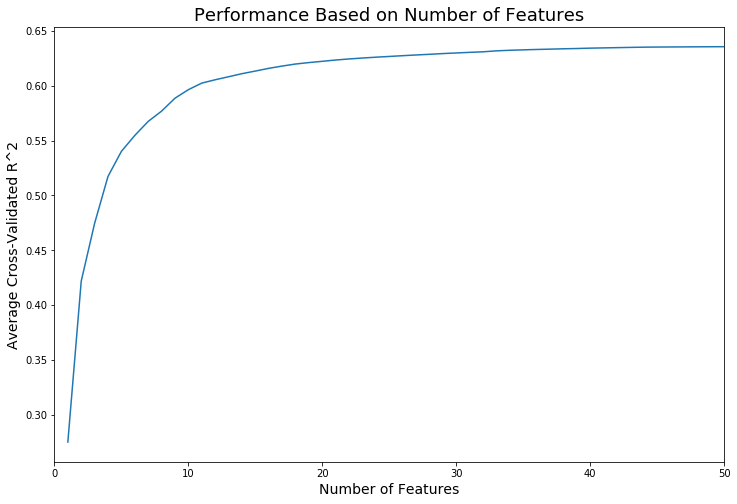

In [13]:
## Visualizing it (50 features)
plt.figure(figsize = (12,8))
avg_score = step1_results['avg_score']
number_features = step1_results['number_features']
plt.plot(number_features, avg_score)
plt.xlabel('Number of Features', fontsize = 14)
plt.ylabel('Average Cross-Validated R^2', fontsize = 14)
plt.title('Performance Based on Number of Features', fontsize = 18)
plt.xlim(0, 50)
plt.show()

In [14]:
## Looking at 10 "best" features
step1_results.iloc[9]['feature_names']

('EMPLOY1_8',
 'FSscore',
 'ACT1_2',
 'PROPPLAN_1',
 'MANAGE1_3',
 'SAVEHABIT',
 'MATHARDSHIP_1',
 'MATHARDSHIP_4',
 'PPINCIMP',
 'DISTRESS')

In [15]:
#### Pulling out the top 20 variables in the order they were selected

## Grabbing the top 21 rows (need one extra for my loop)
top_20 = step1_results['feature_names'][:20]

## Grabbing the first value and then identifying the unique value that is added with each step and appending to list
top_20_list = [top_20[0]]
for i in range(0,19):
    set_1 = set(top_20[i])
    set_2 = set(top_20[i+1])
    top_20_list.append(set_1.symmetric_difference(set_2))

## Storing in dataframe
top_20_df = pd.DataFrame(top_20_list)
top_20_df = top_20_df.reset_index()
top_20_df.columns = ['Variable_Order','Variable_Name']
top_20_df['Variable_Order'] = top_20_df['Variable_Order'] + 1

## Adding in group names
#top_20_df['Group'] = ['Financial Goals/Planning','Hardships Suffered','Health','Financial Habits','Demographics',
                      #'Demographics','Financial Habits','Financial Skills/Knowledge','Financial Goals/Planning',
                      #'Hardships Suffered','Financial Goals/Planning','Financial Habits','Financial Habits',
                      #'Financial Products','Financial Goals/Planning','Financial Beliefs','Hardships Suffered',
                      #'Financial Beliefs','Financial Habits','Demographics']
top_20_df.head(20)

,Variable_Order,Variable_Name
0,1,ACT1_2
1,2,MATHARDSHIP_1
2,3,DISTRESS
3,4,MANAGE1_3
4,5,PPINCIMP
5,6,EMPLOY1_8
6,7,SAVEHABIT
7,8,FSscore
8,9,PROPPLAN_1
9,10,MATHARDSHIP_4


In [16]:
#### Warning: this cell takes about 7 minutes to run on my machine (specs provided below)

# Macbook Air (2014)
# Processor: 1.4 GHz Intel Core i5
# Memory: 4 GB 1600 MHz DDR3

#### Re-running the forward stepwise selection again with max. variables = 100 so we can see exactly what 
#### is the max and where it drops off

## Sub-setting the data and dropping Na's
all_vars = data[y_var + demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]
all_vars = all_vars.dropna()

## Setting dependent variable
y = all_vars[y_var]

## Setting feature matrix
X_all = all_vars[demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]

## Running the feature selector
step2 = SFS(lin_reg, 
           k_features=100, 
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

step2 = step2.fit(X_all, y)

In [17]:
## Checking out the results
step2_results = pd.DataFrame.from_dict(step2.subsets_)
step2_results = step2_results.transpose()
step2_results = step2_results.reset_index()
step2_results = step2_results.rename(columns={"index": "number_features"})
step2_results.tail(50)

,number_features,avg_score,cv_scores,feature_idx,feature_names
50,51,0.635755,"[0.6621778464597402, 0.6448155156373705, 0.629...","(4, 8, 10, 12, 14, 25, 29, 30, 35, 36, 37, 38,...","(EMPLOY1_4, EMPLOY1_8, agecat, PPETHM_1, PPETH..."
51,52,0.635785,"[0.6619374773661824, 0.6449087593156282, 0.629...","(4, 8, 10, 12, 14, 25, 29, 30, 35, 36, 37, 38,...","(EMPLOY1_4, EMPLOY1_8, agecat, PPETHM_1, PPETH..."
52,53,0.635818,"[0.6616270204888854, 0.6445964210653726, 0.630...","(4, 8, 10, 12, 14, 25, 29, 30, 35, 36, 37, 38,...","(EMPLOY1_4, EMPLOY1_8, agecat, PPETHM_1, PPETH..."
53,54,0.635845,"[0.6615258972336466, 0.6449472471355775, 0.630...","(4, 8, 10, 12, 14, 21, 25, 29, 30, 35, 36, 37,...","(EMPLOY1_4, EMPLOY1_8, agecat, PPETHM_1, PPETH..."
54,55,0.635884,"[0.6615765240563636, 0.6448112661840861, 0.630...","(4, 6, 8, 10, 12, 14, 21, 25, 29, 30, 35, 36, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."
55,56,0.635909,"[0.6613397216217637, 0.6445966332161368, 0.630...","(4, 6, 8, 10, 12, 14, 21, 25, 29, 30, 35, 36, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."
56,57,0.635928,"[0.6612153656261692, 0.6447204697996081, 0.630...","(4, 6, 8, 10, 12, 14, 21, 25, 29, 30, 35, 36, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."
57,58,0.635941,"[0.6611269195812918, 0.6447615621784932, 0.630...","(4, 6, 8, 10, 12, 14, 21, 25, 29, 30, 35, 36, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."
58,59,0.635943,"[0.6604918984478232, 0.6451940974438064, 0.630...","(4, 6, 8, 10, 12, 14, 16, 21, 25, 29, 30, 35, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."
59,60,0.635973,"[0.6602299809027483, 0.6448720126189214, 0.630...","(4, 6, 8, 10, 12, 14, 16, 21, 25, 29, 30, 32, ...","(EMPLOY1_4, EMPLOY1_6, EMPLOY1_8, agecat, PPET..."


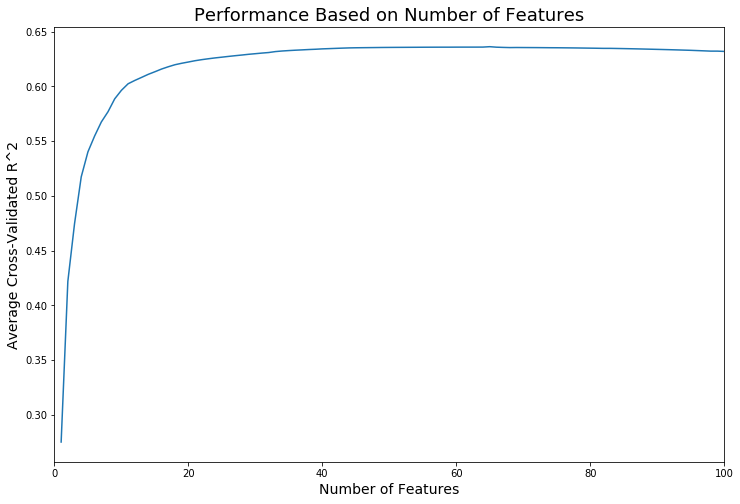

In [18]:
## Visualizing it (all 100 features)
plt.figure(figsize = (12,8))
avg_score = step2_results['avg_score']
number_features = step2_results['number_features']
plt.plot(number_features, avg_score)
plt.xlabel('Number of Features', fontsize = 14)
plt.ylabel('Average Cross-Validated R^2', fontsize = 14)
plt.title('Performance Based on Number of Features', fontsize = 18)
plt.xlim(0, 100)
plt.show()

In [19]:
## Finding the # of features for the max value
step2_results.loc[step2_results['avg_score'] == max(step2_results['avg_score']), 'number_features']

64    65
Name: number_features, dtype: int64

In [20]:
#### Warning: this cell takes about 30 minutes to run on my machine (specs provided below)

# Macbook Air (2014)
# Processor: 1.4 GHz Intel Core i5
# Memory: 4 GB 1600 MHz DDR3

#### Using forward stepwise selection to identify the best model - now using KNN instead of linear regression

## Setting up the knn object
knn = KNeighborsRegressor(n_neighbors = 10)

## Sub-setting the data and dropping Na's
all_vars = data[y_var + demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]
all_vars = all_vars.dropna()

## Setting dependent variable
y = all_vars[y_var]

## Setting feature matrix
X_all = all_vars[demo_vars + skills_vars + goals_vars + habits_vars + products_vars + beliefs_vars + shocks_vars + hardships_vars + benefits_income_vars + health_vars]

## Running the feature selector
step3 = SFS(knn, 
           k_features=50, 
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

step3 = step3.fit(X_all, y)

In [21]:
## Checking out the results
step3_results = pd.DataFrame.from_dict(step3.subsets_)
step3_results = step3_results.transpose()
step3_results = step3_results.reset_index()
step3_results = step3_results.rename(columns={"index": "number_features"})

In [22]:
step3_results.head(50)

,number_features,avg_score,cv_scores,feature_idx,feature_names
0,1,0.210077,"[0.25690709161760406, 0.2597571160402826, 0.21...","(85,)","(MATHARDSHIP_1,)"
1,2,0.376975,"[0.41700064727482744, 0.36383062821547263, 0.3...","(29, 85)","(FSscore, MATHARDSHIP_1)"
2,3,0.413482,"[0.4568284650971435, 0.3794531720011284, 0.401...","(29, 47, 85)","(FSscore, MANAGE1_3, MATHARDSHIP_1)"
3,4,0.453782,"[0.48425994343649104, 0.4373008599183418, 0.44...","(29, 47, 85, 109)","(FSscore, MANAGE1_3, MATHARDSHIP_1, DISTRESS)"
4,5,0.475287,"[0.49974456671847467, 0.452542731727711, 0.463...","(29, 32, 47, 85, 109)","(FSscore, KHscore, MANAGE1_3, MATHARDSHIP_1, D..."
5,6,0.489959,"[0.5065562702426543, 0.47257143545272884, 0.48...","(8, 29, 32, 47, 85, 109)","(EMPLOY1_8, FSscore, KHscore, MANAGE1_3, MATHA..."
6,7,0.501588,"[0.5202307326289706, 0.481802607063611, 0.4905...","(8, 29, 32, 47, 85, 88, 109)","(EMPLOY1_8, FSscore, KHscore, MANAGE1_3, MATHA..."
7,8,0.512723,"[0.5412536377599588, 0.4921231623691389, 0.502...","(8, 29, 32, 47, 57, 85, 88, 109)","(EMPLOY1_8, FSscore, KHscore, MANAGE1_3, PRODH..."
8,9,0.517637,"[0.5375625154723416, 0.5034221639654601, 0.522...","(8, 29, 32, 47, 49, 57, 85, 88, 109)","(EMPLOY1_8, FSscore, KHscore, MANAGE1_3, SAVEH..."
9,10,0.52504,"[0.5556613977166733, 0.511509833878681, 0.5200...","(8, 29, 32, 47, 49, 57, 85, 86, 88, 109)","(EMPLOY1_8, FSscore, KHscore, MANAGE1_3, SAVEH..."


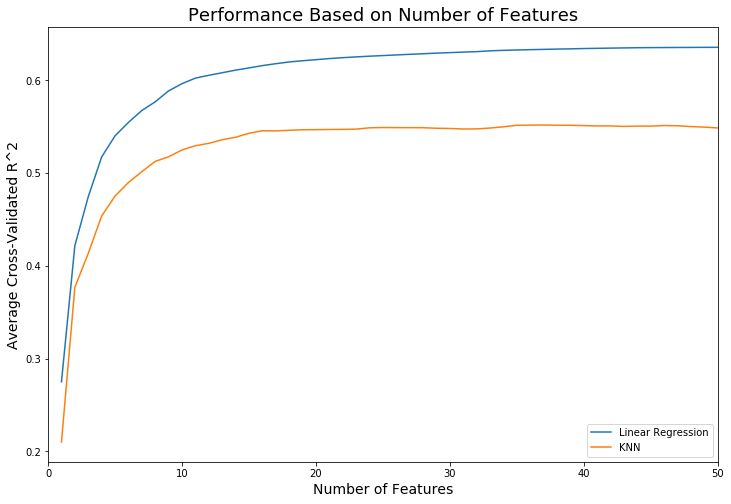

In [23]:
## Visualizing it - KNN vs lin reg
plt.figure(figsize = (12,8))
avg_score_knn = step3_results['avg_score']
number_features_knn = step3_results['number_features']
plt.plot(number_features, avg_score, label = "Linear Regression")
plt.plot(number_features_knn, avg_score_knn, label = 'KNN')
plt.xlabel('Number of Features', fontsize = 14)
plt.ylabel('Average Cross-Validated R^2', fontsize = 14)
plt.title('Performance Based on Number of Features', fontsize = 18)
plt.legend(loc="lower right")
plt.xlim(0, 50)
plt.show()

In [24]:
#### Pulling out the top 20 variables in the order they are selected - KNN

## Grabbing the top 21 rows (need one extra for my loop)
top_20_knn = step3_results['feature_names'][:20]

## Grabbing the first value and then identifying the unique value that is added with each step and appending to list
top_20_knn_list = [top_20_knn[0]]
for i in range(0,19):
    set_1 = set(top_20_knn[i])
    set_2 = set(top_20_knn[i+1])
    top_20_knn_list.append(set_1.symmetric_difference(set_2))

## Storing in dataframe
top_20_knn_df = pd.DataFrame(top_20_knn_list)
top_20_knn_df = top_20_knn_df.reset_index()
top_20_knn_df.columns = ['Variable_Order','Variable_Name']
top_20_knn_df['Variable_Order'] = top_20_knn_df['Variable_Order'] + 1

## Adding in group names
#top_20_df['Group'] = ['Financial Goals/Planning','Hardships Suffered','Health','Financial Habits','Demographics',
                      #'Demographics','Financial Habits','Financial Skills/Knowledge','Financial Goals/Planning',
                      #'Hardships Suffered','Financial Goals/Planning','Financial Habits','Financial Habits',
                      #'Financial Products','Financial Goals/Planning','Financial Beliefs','Hardships Suffered',
                      #'Financial Beliefs','Financial Habits','Demographics']
top_20_knn_df.head(20)

,Variable_Order,Variable_Name
0,1,MATHARDSHIP_1
1,2,FSscore
2,3,MANAGE1_3
3,4,DISTRESS
4,5,KHscore
5,6,EMPLOY1_8
6,7,MATHARDSHIP_4
7,8,PRODHAVE_5
8,9,SAVEHABIT
9,10,MATHARDSHIP_2


In [25]:
## Finding the # of features for the max value KNN
step3_results.loc[step3_results['avg_score'] == max(step3_results['avg_score']), 'number_features']

36    37
Name: number_features, dtype: int64

## Section 3: Variable Summaries and Visualizations

In [26]:
## Narrowing the dataset down to just the 10 "best" features + dependent variable + weights
data_modeling = data[['FWBscore',
                      'finalwt',
                      'EMPLOY1_8',
                      'PPINCIMP',
                      'FSscore',
                      'ACT1_2',
                      'PROPPLAN_1',
                      'MANAGE1_3',
                      'SAVEHABIT',
                      'MATHARDSHIP_1',
                      'MATHARDSHIP_4',
                      'DISTRESS']]

data_modeling.head()

,FWBscore,finalwt,EMPLOY1_8,PPINCIMP,FSscore,ACT1_2,PROPPLAN_1,MANAGE1_3,SAVEHABIT,MATHARDSHIP_1,MATHARDSHIP_4,DISTRESS
0,55.0,0.367292,1,7,44.0,3.0,5.0,2.0,4.0,1.0,1.0,4.0
1,51.0,1.327561,0,6,43.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0
2,49.0,0.835156,0,6,42.0,3.0,4.0,3.0,5.0,1.0,1.0,2.0
3,49.0,1.410871,0,8,42.0,NaN,3.0,2.0,4.0,2.0,2.0,NaN
4,49.0,4.260668,0,7,42.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0


In [27]:
## Dropping NA's
data_modeling = data_modeling.dropna()

## Checking out new length
len(data_modeling)

6320

In [28]:
## Writing the function that I'll use to summarize the 2 continuous variables
def summarize_continuous(variable_name, short_description):
    '''
    This function summarizes a continuous variable from the dataset by calculating the mean, standard deviation,
    minimum and maximum. It presents this information, as well as the variable name and a short description of 
    the variable in a dataframe.
    '''
    mean = round(data_modeling[variable_name].mean(),2)
    stdev = round(data_modeling[variable_name].std(),2)
    mini = int(data_modeling[variable_name].min())
    maxi = int(data_modeling[variable_name].max())
    summary_table = pd.DataFrame({"Metric": ['Variable Name', 'Short Description', 'Mean', 'Standard Deviation', 'Minimum', 'Maximum'],
                                  "Value": [variable_name, short_description, mean, stdev, mini, maxi]})
    summary_table = summary_table.set_index('Metric')
    return summary_table

In [29]:
## Writing the function that I'll use to summarize the binary/ordered/categorical variables
def summarize_qualitative(variable_name):
    '''
    
    This function creates a summary table of a variable from our dataset. First, it counts how many times 
    each variable appears in our original dataset (with numeric values coded). Then, it finds the average
    FWBscore for each value. Next, it integrates the mapped label for each variable value. Finally, it adds 
    a column to display the percentage of the total dataset each value comprises.
    
    '''
    summary_table_1 = pd.DataFrame(data_modeling.groupby([variable_name])[variable_name].count())
    summary_table_1.columns = ["Frequency"]
    summary_table_2 = pd.DataFrame(data_modeling.groupby([variable_name])['FWBscore'].mean())
    summary_table_2.columns = ["Average_FWBscore"]
    summary_table_2['Average_FWBscore'] = round(summary_table_2['Average_FWBscore'],2)
    summary_table = pd.merge(summary_table_1,summary_table_2,left_index = True, right_index = True)
    summary_table['Mapped_Label'] = summary_table.index.map(mappings[variable_name])
    summary_table['Percentage'] = summary_table['Frequency'] / summary_table['Frequency'].sum()
    summary_table = summary_table[['Mapped_Label','Frequency','Percentage','Average_FWBscore']]
    summary_table = summary_table.style.format({
    'Percentage': '{:,.1%}'.format})
    return summary_table

#### Dependent Variable:

In [30]:
## Summarizing the dependent variable
summarize_continuous(variable_name = 'FWBscore',
                     short_description = "Financial Well-Being Scale Score")

,Value
Metric,
Variable Name,FWBscore
Short Description,Financial Well-Being Scale Score
Mean,56.12
Standard Deviation,14.07
Minimum,14
Maximum,95


In [31]:
## Preparing data for visualization
FWBscore_1 = pd.DataFrame(data_modeling.groupby(['FWBscore'])['FWBscore'].count())
FWBscore_1.columns = ["frequency"]
FWBscore_1 = FWBscore_1.reset_index()
FWBscore_1.columns = ['score','frequency']
FWBscore_1['percentage'] = FWBscore_1['frequency'] / FWBscore_1['frequency'].sum()

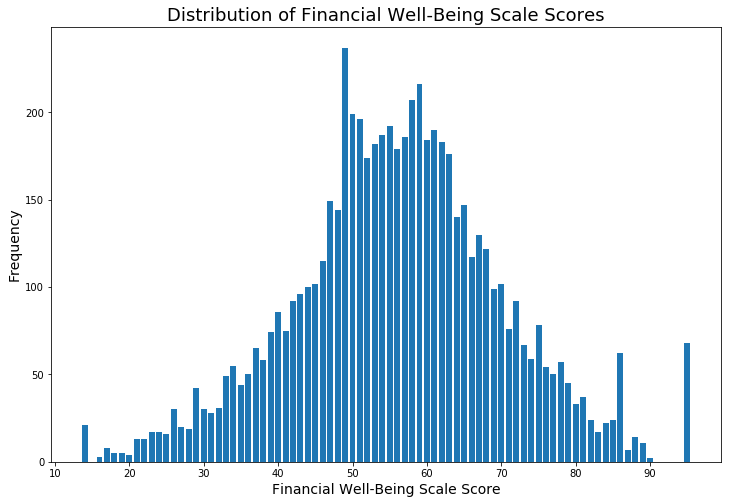

In [32]:
## Making a bar chart to visualize it
plt.figure(figsize = (12,8))
frequency = FWBscore_1['frequency']
scores = FWBscore_1['score']
plt.bar(scores, frequency)
plt.xlabel('Financial Well-Being Scale Score', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Distribution of Financial Well-Being Scale Scores', fontsize = 18)
plt.show()

#### Independent Variables:

In [33]:
## Summarizing the one continuous independent variable: FSscore
summarize_continuous(variable_name = 'FSscore',
                     short_description = "Financial Skill Scale Score")

,Value
Metric,
Variable Name,FSscore
Short Description,Financial Skill Scale Score
Mean,50.78
Standard Deviation,12.52
Minimum,5
Maximum,85


In [34]:
## Preparing data for visualization
FSscore_1 = pd.DataFrame(data_modeling.groupby(['FSscore'])['FSscore'].count())
FSscore_1.columns = ["frequency"]
FSscore_1 = FSscore_1.reset_index()
FSscore_1.columns = ['score','frequency']
FSscore_1['percentage'] = FSscore_1['frequency'] / FSscore_1['frequency'].sum()

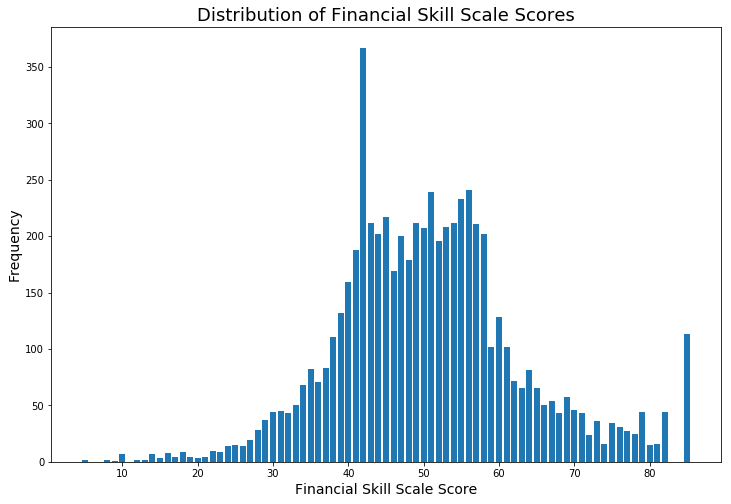

In [35]:
## Making a bar chart to visualize it
plt.figure(figsize = (12,8))
frequency = FSscore_1['frequency']
scores = FSscore_1['score']
plt.bar(scores, frequency)
plt.xlabel('Financial Skill Scale Score', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Distribution of Financial Skill Scale Scores', fontsize = 18)
plt.show()

In [36]:
summarize_qualitative('EMPLOY1_8')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
EMPLOY1_8,,,,
0,No,4438,70.2%,53.34
1,Yes,1882,29.8%,62.7


In [37]:
summarize_qualitative('PPINCIMP')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
PPINCIMP,,,,
1,"Less than $20,000",701,11.1%,46.04
2,"$20,000 to $29,999",501,7.9%,49.65
3,"$30,000 to $39,999",607,9.6%,51.45
4,"$40,000 to $49,999",458,7.2%,53.78
5,"$50,000 to $59,999",501,7.9%,55.74
6,"$60,000 to $74,999",650,10.3%,56.76
7,"$75,000 to $99,999",942,14.9%,58.67
8,"$100,000 to $149,999",1105,17.5%,60.27
9,"$150,000 or more",855,13.5%,64.34


In [38]:
summarize_qualitative('ACT1_2')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
ACT1_2,,,,
1.0,Not at all,98,1.6%,37.13
2.0,Very little,461,7.3%,42.25
3.0,Somewhat,2200,34.8%,50.17
4.0,Very well,2544,40.3%,60.48
5.0,Completely,1017,16.1%,66.21


In [39]:
summarize_qualitative('PROPPLAN_1')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
PROPPLAN_1,,,,
1.0,Strongly disagree,200,3.2%,56.62
2.0,Disagree,722,11.4%,56.93
3.0,Neither agree nor disagree,1305,20.6%,55.82
4.0,Agree,2754,43.6%,55.64
5.0,Strongly agree,1339,21.2%,56.9


In [40]:
summarize_qualitative('MANAGE1_3')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
MANAGE1_3,,,,
1.0,Not applicable or never,1196,18.9%,45.33
2.0,Seldom,635,10.0%,49.14
3.0,Sometimes,841,13.3%,51.78
4.0,Often,825,13.1%,56.1
5.0,Always,2823,44.7%,63.57


In [41]:
summarize_qualitative('SAVEHABIT')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
SAVEHABIT,,,,
1.0,Strongly disagree,295,4.7%,40.01
2.0,Disagree,607,9.6%,45.68
3.0,Disagree slightly,653,10.3%,48.88
4.0,Agree slightly,1310,20.7%,53.46
5.0,Agree,1717,27.2%,59.24
6.0,Strongly agree,1738,27.5%,64.15


In [42]:
summarize_qualitative('MATHARDSHIP_1')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
MATHARDSHIP_1,,,,
1.0,Never,5199,82.3%,59.42
2.0,Sometimes,834,13.2%,42.88
3.0,Often,287,4.5%,34.88


In [43]:
summarize_qualitative('MATHARDSHIP_4')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
MATHARDSHIP_4,,,,
1.0,Never,5301,83.9%,58.76
2.0,Sometimes,791,12.5%,43.94
3.0,Often,228,3.6%,37.15


In [44]:
summarize_qualitative('DISTRESS')

,Mapped_Label,Frequency,Percentage,Average_FWBscore
DISTRESS,,,,
1.0,Strongly disagree,391,6.2%,66.57
2.0,Disagree,1465,23.2%,63.01
3.0,Neither agree nor disagree,1989,31.5%,56.99
4.0,Agree,1779,28.1%,52.09
5.0,Strongly agree,696,11.0%,43.57


## Section 4: Modeling

In [45]:
#### Running a linear regression model with the 10 independent vars

## Setting dependent variable
y = data_modeling['FWBscore']

## Setting feature matrix
X = data_modeling[['EMPLOY1_8',
                   'PPINCIMP',
                   'FSscore',
                   'ACT1_2',
                   'PROPPLAN_1',
                   'MANAGE1_3',
                   'SAVEHABIT',
                   'MATHARDSHIP_1',
                   'MATHARDSHIP_4',
                   'DISTRESS']]

## Survey weights - will be used later (not immediately here below)
wts = data_modeling['finalwt']

## Creating the linear regression model object
lin_reg = LinearRegression()

## Fitting the model
lin_reg.fit(X,y)

## Cross-val scores
cross_vals = cross_val_score(lin_reg, X, y, cv = 5, error_score = 'raise')
cross_vals_mean = np.mean(cross_vals)

## Print results
print("Average R^2 from Linear Regression w/ 5-fold CV:",round(cross_vals_mean,4))

Average R^2 from Linear Regression w/ 5-fold CV: 0.5979


In [46]:
## Checking out the coefficients (can cross-reference with below)
lin_reg.coef_

array([ 4.18059957,  0.78468572,  0.18315528,  2.33880723, -1.5276502 ,
        1.20894792,  1.33030374, -3.82210378, -3.33198032, -2.48282675])

In [47]:
#### Using statsmodels to get a clean regression output for inference purposes

## Adding intercept
X_int = copy.deepcopy(X)
X_int['intercept'] = 1

## Fitting the model
ols = sm.OLS(y, X_int)
ols_results = ols.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:               FWBscore   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     951.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:12:41   Log-Likelihood:                -22773.
No. Observations:                6320   AIC:                         4.557e+04
Df Residuals:                    6309   BIC:                         4.564e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EMPLOY1_8         4.1806      0.265     15.775

In [48]:
#### Using statsmodels to get a clean regression output for inference purposes - WITH WEIGHTING

## Adding intercept
X_int = copy.deepcopy(X)
X_int['intercept'] = 1

## Fitting the model
wls = sm.WLS(y, X_int, weights = wts)
wls_results = wls.fit()
print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:               FWBscore   R-squared:                       0.579
Model:                            WLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     868.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:12:41   Log-Likelihood:                -23227.
No. Observations:                6320   AIC:                         4.648e+04
Df Residuals:                    6309   BIC:                         4.655e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EMPLOY1_8         3.6940      0.295     12.538

In [49]:
#### Modifying the dataset to have standardized variables

## Creating a copy of the X vars
X_std = copy.deepcopy(X)

## Making the columns float type to avoid warnings
X_std = X_std.astype('float64')

## Creating the standard scaler object
scaler = preprocessing.StandardScaler()

## Standardizing the variables
X_std = scaler.fit_transform(X_std)

In [50]:
#### Using statsmodels to get a clean regression output for inference purposes - with standardized vars

## Adding intercept
X_int = pd.DataFrame(X_std, columns = X.columns)
X_int['intercept'] = 1

## Re-setting index on y to match X
y_int = y.reset_index()
y_int = y_int.drop(columns = 'index')

## Fitting the model
ols = sm.OLS(y_int, X_int)
ols_results_std = ols.fit()
print(ols_results_std.summary())

                            OLS Regression Results                            
Dep. Variable:               FWBscore   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     951.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:12:41   Log-Likelihood:                -22773.
No. Observations:                6320   AIC:                         4.557e+04
Df Residuals:                    6309   BIC:                         4.564e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EMPLOY1_8         1.9117      0.121     15.775

In [51]:
#### Using statsmodels to get a clean regression output for inference purposes - with standardized vars and weighting

## Adding intercept
X_int = pd.DataFrame(X_std, columns = X.columns)
X_int['intercept'] = 1

## Re-setting index on y to match X
y_int = y.reset_index()
y_int = y_int.drop(columns = 'index')

## Re-setting index on weights to match X
wts_int = wts.reset_index()
wts_int = wts_int.drop(columns = 'index')

## Fitting the model
wls = sm.WLS(y_int, X_int, weights = wts_int)
wls_results_std = wls.fit()
print(wls_results_std.summary())

                            WLS Regression Results                            
Dep. Variable:               FWBscore   R-squared:                       0.579
Model:                            WLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     868.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:12:41   Log-Likelihood:                -23227.
No. Observations:                6320   AIC:                         4.648e+04
Df Residuals:                    6309   BIC:                         4.655e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
EMPLOY1_8         1.6892      0.135     12.538

In [52]:
## Pulling out the standardized / non-weighted coefficients
coef_results_1 = pd.DataFrame(round(ols_results_std.params,2), columns = ['Standardized_Coefficient'])

## Pulling out the standardized / weighted coefficients
coef_results_2 = pd.DataFrame(round(wls_results_std.params,2), columns = ['Standardized_Coefficient_Weighted'])

## Merging
coef_results = pd.merge(coef_results_1, coef_results_2, left_index = True, right_index = True)

## Taking absolute values of each
coef_results['Standardized_Coefficient_Abs'] = abs(coef_results['Standardized_Coefficient'])
coef_results['Standardized_Coefficient_Weighted_Abs'] = abs(coef_results['Standardized_Coefficient_Weighted'])

## Drop the intercept
coef_results = coef_results.drop('intercept')

## Sorting the variables by abs value non-weighted
coef_results.sort_values(by=['Standardized_Coefficient_Abs'], ascending = False)

,Standardized_Coefficient,Standardized_Coefficient_Weighted,Standardized_Coefficient_Abs,Standardized_Coefficient_Weighted_Abs
DISTRESS,-2.70,-2.75,2.70,2.75
FSscore,2.29,1.86,2.29,1.86
PPINCIMP,2.09,2.02,2.09,2.02
ACT1_2,2.09,1.96,2.09,1.96
MATHARDSHIP_1,-1.96,-2.05,1.96,2.05
SAVEHABIT,1.94,2.10,1.94,2.10
EMPLOY1_8,1.91,1.69,1.91,1.69
MANAGE1_3,1.90,1.72,1.90,1.72
MATHARDSHIP_4,-1.60,-1.52,1.60,1.52
PROPPLAN_1,-1.57,-1.41,1.57,1.41


In [53]:
#### Making predictions with 5-fold cv

## Running the predictions
y_preds = cross_val_predict(lin_reg, X, y, cv=5)

## Combining y and y preds into dataframe
predictions = pd.DataFrame({'y':y, 'y_preds':y_preds})

## Taking the delta
predictions['delta'] = predictions['y_preds'] - predictions['y']

## Taking the absolute value of the delta
predictions['delta_abs'] = abs(predictions['delta'])

## Taking the delta %
predictions['delta_pct'] = predictions['delta_abs'] / predictions['y']

predictions.head(10)

,y,y_preds,delta,delta_abs,delta_pct
0,55.0,52.911695,-2.088305,2.088305,0.037969
1,51.0,47.783866,-3.216134,3.216134,0.063061
2,49.0,56.305033,7.305033,7.305033,0.149082
4,49.0,47.821742,-1.178258,1.178258,0.024046
5,67.0,56.540538,-10.459462,10.459462,0.156111
6,51.0,56.753418,5.753418,5.753418,0.112812
7,47.0,25.638727,-21.361273,21.361273,0.454495
8,43.0,62.287934,19.287934,19.287934,0.448557
9,58.0,55.176001,-2.823999,2.823999,0.048690
10,78.0,67.190405,-10.809595,10.809595,0.138585


In [54]:
## Taking the average of delta_abs and delta_pct
delta_abs_avg = round(predictions['delta_abs'].mean(),2)
delta_pct_avg = round(predictions['delta_pct'].mean(),4)
delta_pct_avg = round(delta_pct_avg*100,2)

print("On average, the predictions are",delta_abs_avg,"points, or", delta_pct_avg, "% away from the true value of the dependent variable.")

On average, the predictions are 6.85 points, or 13.88 % away from the true value of the dependent variable.


In [55]:
#### Shifting gears into KNN: Creating a validation curve to identify the optimal number of neighbors. 
#### This is without using standardized variables. The performance is poor as a result, and I'll re-implement it
#### with standardized variables below.

## Creating the knn model object
knn = KNeighborsRegressor(n_neighbors = 10)

## Fit the data
knn.fit(X,y)

## Defining the set of options for k
k_options = np.arange(1,51)

## Calculating training and test scores
training_scores, test_scores = validation_curve(knn, X, y, param_name='n_neighbors',
                                            param_range=k_options, cv=5)

## Computing the set of training and test means
training_mean = np.mean(training_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

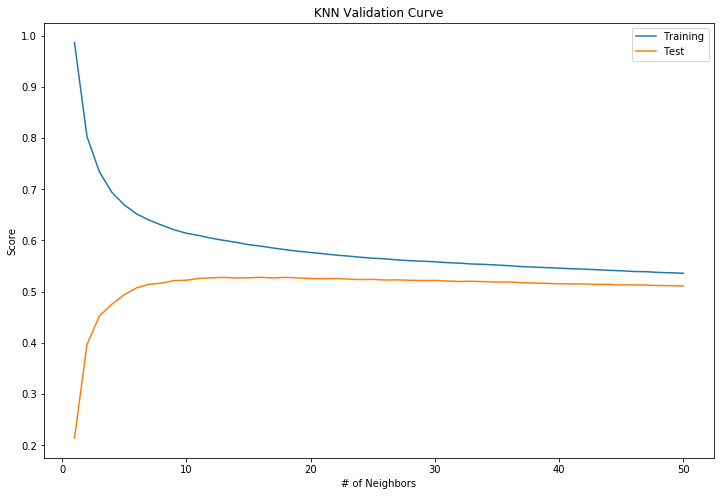

In [56]:
## Plotting the validation curve
plt.figure(figsize = (12,8))
plt.plot(k_options, training_mean, label='Training')
plt.plot(k_options, test_mean, label='Test')
plt.xlabel('# of Neighbors')
plt.ylabel('Score')
plt.title('KNN Validation Curve')
plt.legend()
plt.show()

In [57]:
## Finding which value of k has the max score (need to add 1 on account of 0-based indexing)
np.argmax(test_mean) + 1

16

In [58]:
#### Running KNN regressor with the 10 independent vars

## Creating the knn model object
knn = KNeighborsRegressor(n_neighbors = 16)

## Cross-val scores
cross_vals = cross_val_score(knn, X, y, cv = 5, error_score = 'raise')
cross_vals_mean = np.mean(cross_vals)

## Print results
print("Average R^2 from KNN w/ 5-fold CV:",round(cross_vals_mean,4))

Average R^2 from KNN w/ 5-fold CV: 0.5279


In [59]:
#### Creating a validation curve to identify the optimal number of neighbors (with standardized vars now)

## Creating the knn model object
knn = KNeighborsRegressor(n_neighbors = 10)

## Fit the data
knn.fit(X_std,y)

## Defining the set of options for k
k_options = np.arange(1,51)

## Calculating training and test scores
training_scores, test_scores = validation_curve(knn, X_std, y, param_name='n_neighbors',
                                            param_range=k_options, cv=5)

## Computing the set of training and test means
training_mean = np.mean(training_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

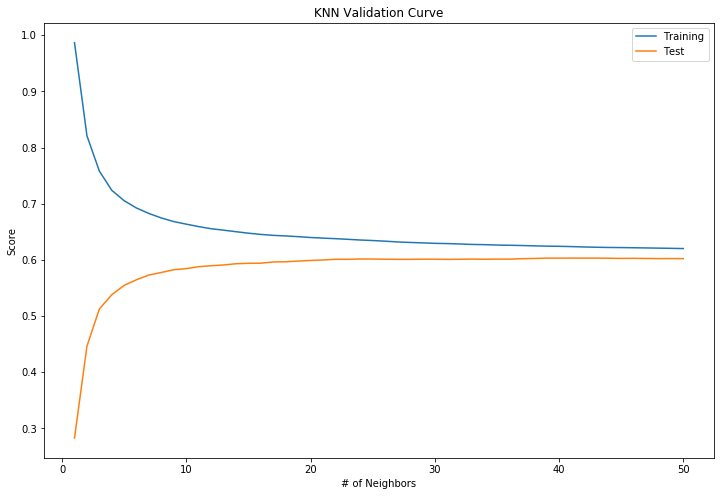

In [60]:
## Plotting the validation curve
plt.figure(figsize = (12,8))
plt.plot(k_options, training_mean, label='Training')
plt.plot(k_options, test_mean, label='Test')
plt.xlabel('# of Neighbors')
plt.ylabel('Score')
plt.title('KNN Validation Curve')
plt.legend()
plt.show()

In [61]:
## Finding which value of k has the max score (need to add 1 on account of 0-based indexing)
np.argmax(test_mean) + 1

41

In [62]:
#### Running KNN regressor with the 10 independent vars

## Creating the knn model object
knn = KNeighborsRegressor(n_neighbors = 41)

## Cross-val scores
cross_vals = cross_val_score(knn, X_std, y, cv = 5, error_score = 'raise')
cross_vals_mean = np.mean(cross_vals)

## Print results
print("Average R^2 from KNN w/ 5-fold CV:",round(cross_vals_mean,4))

Average R^2 from KNN w/ 5-fold CV: 0.603


In [63]:
#### Making predictions with 5-fold cv - KNN

## Running the predictions
y_preds_knn = cross_val_predict(knn, X_std, y, cv=5)

## Combining y and y preds into dataframe
predictions_knn = pd.DataFrame({'y':y, 'y_preds_knn':y_preds_knn})

## Taking the delta
predictions_knn['delta'] = predictions_knn['y_preds_knn'] - predictions_knn['y']

## Taking the absolute value of the delta
predictions_knn['delta_abs'] = abs(predictions_knn['delta'])

## Taking the delta %
predictions_knn['delta_pct'] = predictions_knn['delta_abs'] / predictions_knn['y']

predictions_knn.head(10)

,y,y_preds_knn,delta,delta_abs,delta_pct
0,55.0,52.560976,-2.439024,2.439024,0.044346
1,51.0,48.658537,-2.341463,2.341463,0.045911
2,49.0,54.756098,5.756098,5.756098,0.117471
4,49.0,46.219512,-2.780488,2.780488,0.056745
5,67.0,60.268293,-6.731707,6.731707,0.100473
6,51.0,57.780488,6.780488,6.780488,0.132951
7,47.0,33.365854,-13.634146,13.634146,0.290088
8,43.0,61.780488,18.780488,18.780488,0.436756
9,58.0,55.414634,-2.585366,2.585366,0.044575
10,78.0,66.243902,-11.756098,11.756098,0.150719


In [64]:
## Taking the average of delta_abs and delta_pct
delta_abs_avg = round(predictions_knn['delta_abs'].mean(),2)
delta_pct_avg = round(predictions_knn['delta_pct'].mean(),4)
delta_pct_avg = round(delta_pct_avg*100,2)

print("On average, the predictions are",delta_abs_avg,"points, or", delta_pct_avg, "% away from the true value of the dependent variable.")

On average, the predictions are 6.78 points, or 14.06 % away from the true value of the dependent variable.
